In [22]:
# жесткое подключение библиотек
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import utils
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
class_names = ['0', '1', '2', '3', 
               '4', '5', '6', '7', 
               '8', '9']

## Предобработка данных.

In [25]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
y_train.shape, y_test.shape

((60000,), (10000,))

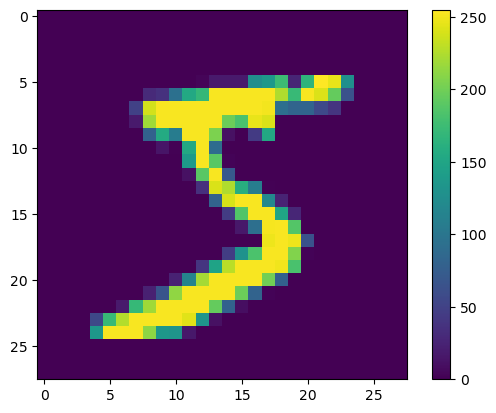

In [27]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [28]:
# нормализация данных

x_train = x_train / 255.0
x_test = x_test / 255.0

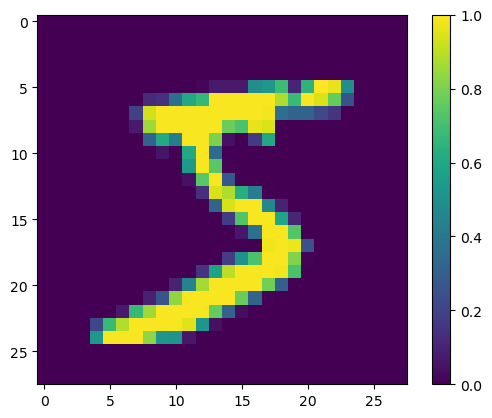

In [29]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

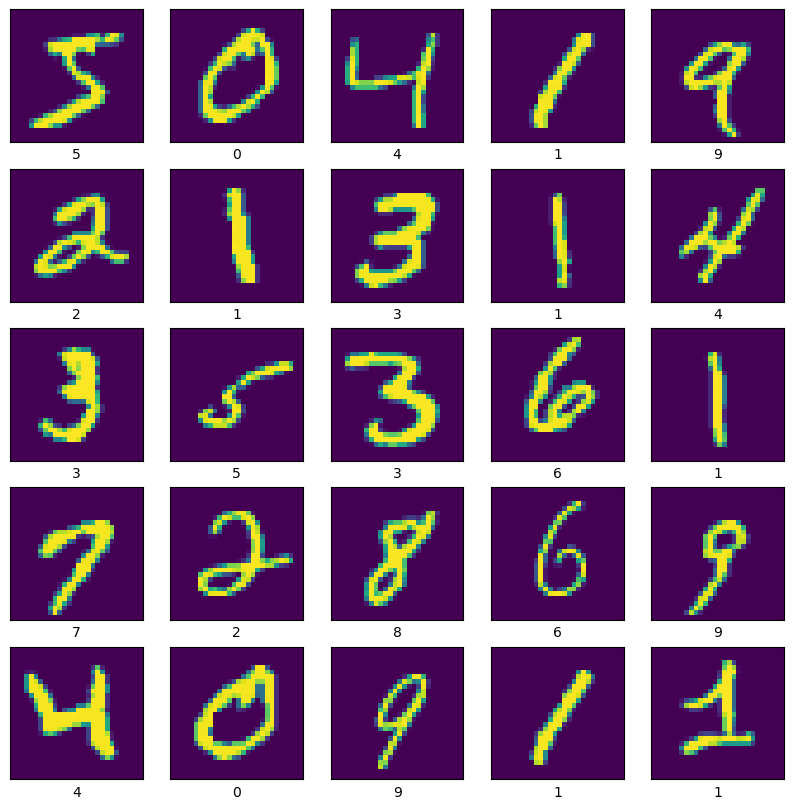

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

## Построение модели.

In [ ]:
# model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
#                          keras.layers.Dense(128, activation='relu'),
#                          keras.layers.Dense(10, activation='softmax')])

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2), # регуляция дл уменьшения переобучения
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
# model.compile(optimizer=tf.keras.optimizers.SGD(),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(x_train, y_train, epochs=40, batch_size=128)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8358 - loss: 0.5541
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9596 - loss: 0.1319
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9727 - loss: 0.0888
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9789 - loss: 0.0666
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9826 - loss: 0.0534
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9849 - loss: 0.0446
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9871 - loss: 0.0386
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9884 - loss: 0.0338
Epoch 9/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9899 - loss: 0.0314
Epoch 10/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9912 - loss: 0.0259
Epoch 11/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9918 - loss: 0.0242
Epoch 12/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/ste

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом наборе:', test_acc)
print('Потеря на тестовом наборе:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9805 - loss: 0.1012
Точность на тестовом наборе: 0.9832000136375427
Потеря на тестовом наборе: 0.0880969688296318


## Предсказание.

In [36]:
predictions = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [37]:
predictions[0]

array([1.0682349e-34, 1.1754191e-23, 9.1438429e-24, 4.2371863e-11,
       0.0000000e+00, 1.0000000e+00, 5.0498238e-32, 1.1238401e-25,
       4.0945872e-27, 5.0250409e-22], dtype=float32)

In [38]:
np.argmax(predictions[0])

5

In [39]:
y_train[0]

5

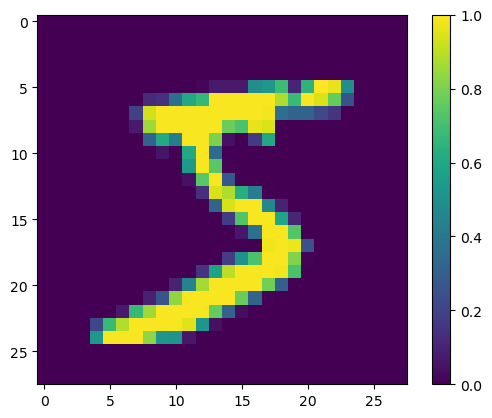

In [40]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [41]:
class_names[np.argmax(predictions[0])]

'5'

In [42]:
# сохранение модели

model.save('model.keras')